# Infections by Covid19 Mexico 

#### Libraries and data loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import folium
plt.style.use('ggplot')

##### Updated data from 5 April 2020

In [2]:
dfm = pd.read_csv("CoordMunicipios.csv", encoding = "ISO-8859-1")
dfe = pd.read_csv("CoordEstados.csv", encoding = "ISO-8859-1")

file = "200504COVID19MEXICO.csv"
df = pd.read_csv(file, encoding = "ISO-8859-1")

## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100041 entries, 0 to 100040
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   FECHA_ACTUALIZACION  100041 non-null  object
 1   ID_REGISTRO          100041 non-null  object
 2   ORIGEN               100041 non-null  int64 
 3   SECTOR               100041 non-null  int64 
 4   ENTIDAD_UM           100041 non-null  int64 
 5   SEXO                 100041 non-null  int64 
 6   ENTIDAD_NAC          100041 non-null  int64 
 7   ENTIDAD_RES          100041 non-null  int64 
 8   MUNICIPIO_RES        100041 non-null  int64 
 9   TIPO_PACIENTE        100041 non-null  int64 
 10  FECHA_INGRESO        100041 non-null  object
 11  FECHA_SINTOMAS       100041 non-null  object
 12  FECHA_DEF            100041 non-null  object
 13  INTUBADO             100041 non-null  int64 
 14  NEUMONIA             100041 non-null  int64 
 15  EDAD                 100041 non-nu

In [4]:
df.describe(include='all')

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
count,100041,100041,100041.000000,100041.000000,100041.000000,100041.000000,100041.000000,100041.000000,100041.000000,100041.000000,...,100041.000000,100041.000000,100041.000000,100041.000000,100041.000000,100041.000000,100041.000000,100041,100041,100041.000000
unique,1,99843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,30,NaN
top,04/05/2020,0.00E+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MÃ©xico,99,NaN
freq,100041,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98830,99847,NaN
mean,NaN,NaN,1.618586,9.410712,14.670345,1.509931,16.353695,14.909697,35.469627,1.268200,...,2.374077,2.216931,2.372527,2.299647,37.413381,1.882428,98.533621,NaN,NaN,71.524685
std,NaN,NaN,0.485736,8.225514,8.048884,0.499904,12.110757,7.979168,45.360669,0.443025,...,6.226308,6.049527,6.158886,6.168772,47.021073,0.605396,6.723967,NaN,NaN,42.111667
min,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000
25%,NaN,NaN,1.000000,4.000000,9.000000,1.000000,9.000000,9.000000,7.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,99.000000,NaN,NaN,2.000000
50%,NaN,NaN,2.000000,12.000000,14.000000,2.000000,15.000000,14.000000,20.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,NaN,NaN,97.000000
75%,NaN,NaN,2.000000,12.000000,20.000000,2.000000,21.000000,20.000000,45.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,99.000000,NaN,NaN,97.000000


#### Percentages

In [5]:
for col in df.columns:
    print(df[col].value_counts(normalize=True).head(10))

04/05/2020    1.0
Name: FECHA_ACTUALIZACION, dtype: float64
0.00E+00    0.00035
1.86E+10    0.00005
1.41E+03    0.00004
1.94E+03    0.00003
1.36E+11    0.00003
1.26E+09    0.00003
1.76E+07    0.00003
1.54E+10    0.00003
1.06E+08    0.00003
1.21E+10    0.00003
Name: ID_REGISTRO, dtype: float64
2    0.618586
1    0.381414
Name: ORIGEN, dtype: float64
12    0.554193
4     0.334023
9     0.037914
6     0.035555
3     0.013574
8     0.007767
99    0.006617
11    0.005018
13    0.002299
10    0.002149
Name: SECTOR, dtype: float64
9     0.250847
15    0.100989
19    0.063554
14    0.062384
11    0.052628
2     0.039934
5     0.039614
25    0.030497
30    0.030168
28    0.028518
Name: ENTIDAD_UM, dtype: float64
2    0.509931
1    0.490069
Name: SEXO, dtype: float64
9     0.227007
15    0.116022
14    0.058606
19    0.051029
11    0.049230
30    0.042233
5     0.038224
25    0.037035
21    0.032077
28    0.028098
Name: ENTIDAD_NAC, dtype: float64
9     0.215312
15    0.134675
19    0.063054
14 

#### Date transformation

In [6]:
df.FECHA_DEF = df.FECHA_DEF.map(lambda x: dt.datetime.strptime(x, '%d/%m/%Y') if x != '9999-99-99' else x)
    
df.FECHA_ACTUALIZACION = df.FECHA_ACTUALIZACION.map(lambda x : dt.datetime.strptime(x, '%d/%m/%Y'))
    
df.FECHA_INGRESO = df.FECHA_INGRESO.map(lambda x : dt.datetime.strptime(x, '%d/%m/%Y'))

df.FECHA_SINTOMAS = df.FECHA_SINTOMAS.map(lambda x : dt.datetime.strptime(x, '%d/%m/%Y'))


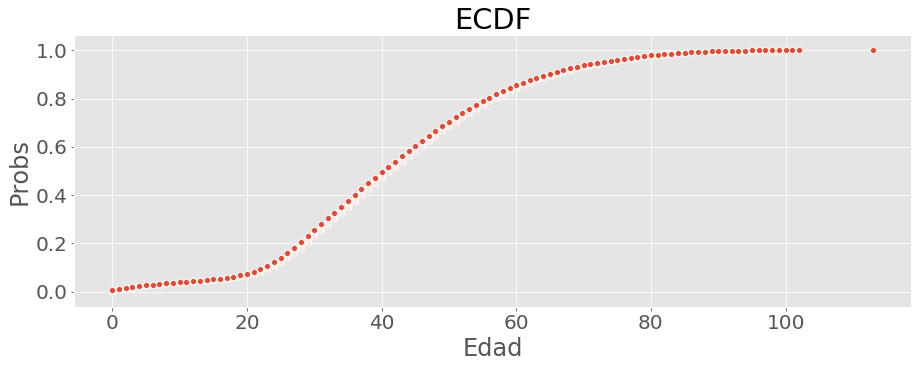

In [7]:
plt.rcParams['font.size']=20
fig, ax = plt.subplots(figsize=(15,5))
x= np.sort(df.EDAD)
n=len(x)
y = np.arange(1, 1+n)/n
sns.scatterplot(x=x, y=y)
plt.xlabel('Edad')
plt.ylabel('Probs')
plt.title('ECDF')
plt.show()

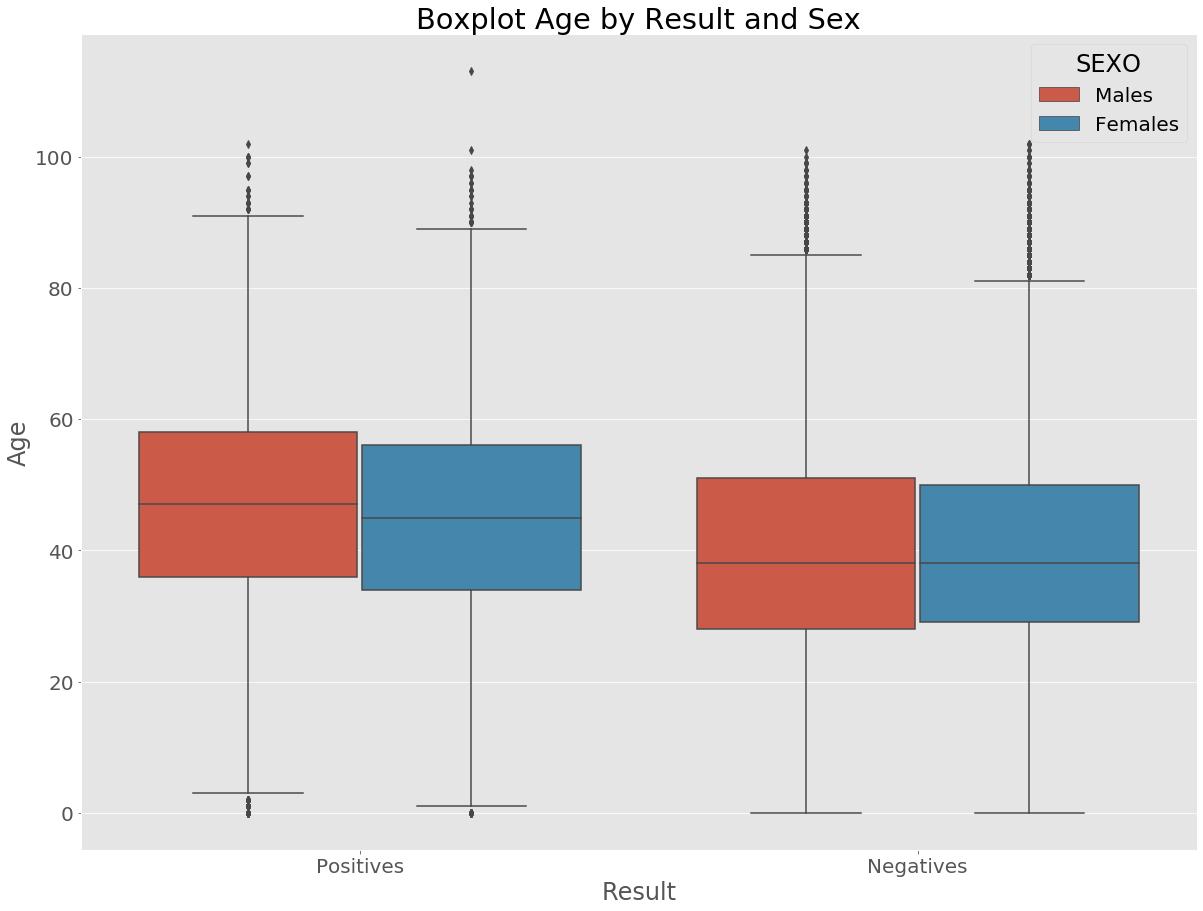

In [8]:
plt.rcParams['font.size']=20
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(x = df[df.RESULTADO != 3].RESULTADO, y = df.EDAD, hue = df.SEXO.replace({1:'Females',
                                                                                     2:'Males'}))
plt.xlabel('Result')
plt.ylabel('Age')
plt.title('Boxplot Age by Result and Sex')
ax.set(xticklabels=['Positives', 'Negatives'] )
plt.show()

### Around 62% of the tests were negative and 25% positive

2    0.619676
1    0.248948
3    0.131376
Name: RESULTADO, dtype: float64


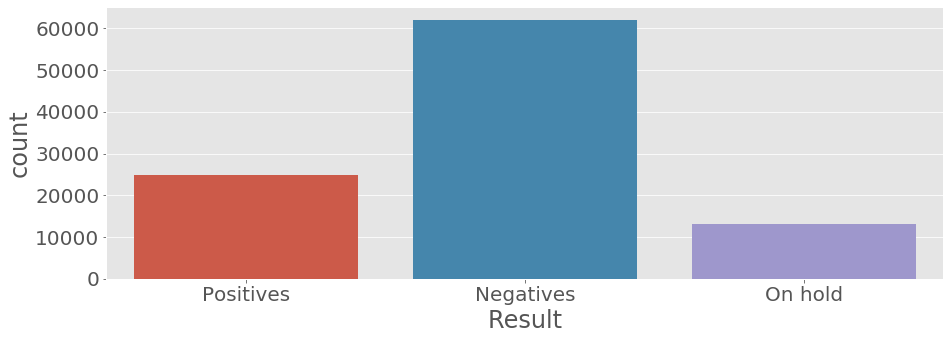

In [9]:
print(df.RESULTADO.value_counts(normalize=True))
plt.rcParams['font.size']=20
fig, ax = plt.subplots(figsize=(15,5))
plt.style.use('ggplot')
g=sns.countplot(data=df, x='RESULTADO')
g.set(xticklabels=['Positives','Negatives', 'On hold'])
plt.xlabel('Result')
plt.show()


#### Patients who had contact with others infected

99    0.368239
2     0.325956
1     0.305805
Name: OTRO_CASO, dtype: float64


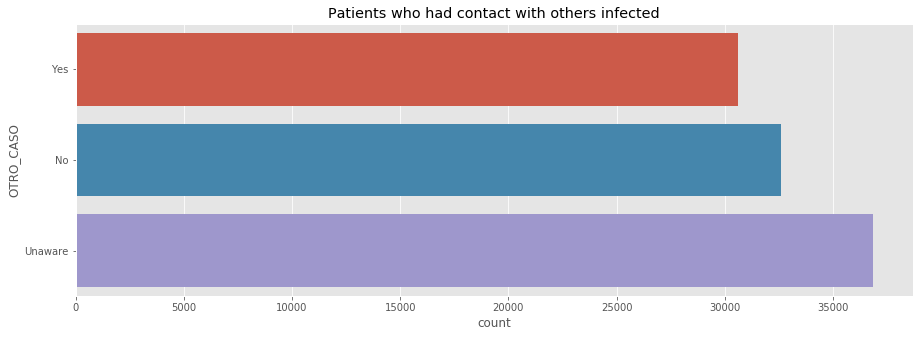

In [10]:
print(df.OTRO_CASO.value_counts(normalize=True))
fig, ax = plt.subplots(figsize=(15,5))
g=sns.countplot(data=df, y='OTRO_CASO')
g.set(yticklabels=['Yes','No', 'Unaware'])
plt.title('Patients who had contact with others infected')
plt.show()

#### Patient care place

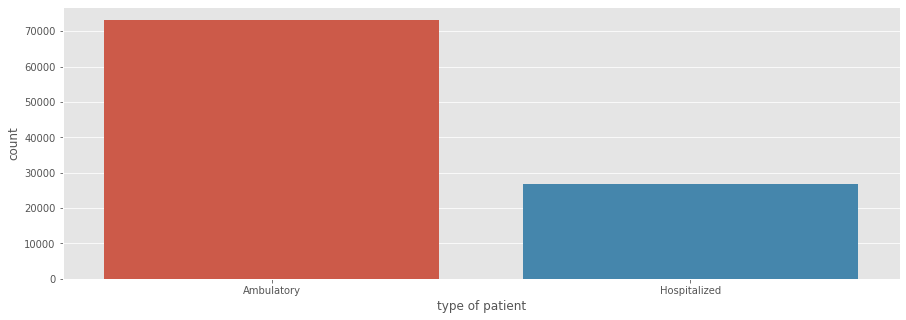

1    0.7318
2    0.2682
Name: TIPO_PACIENTE, dtype: float64


In [11]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(data=df, x='TIPO_PACIENTE')
ax.set(xticklabels=['Ambulatory','Hospitalized'])
plt.xlabel('type of patient')
plt.show()
print(df.TIPO_PACIENTE.value_counts(normalize=True))

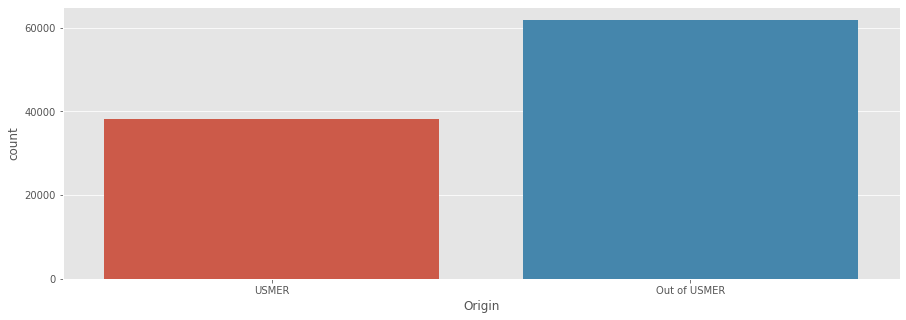

2    0.618586
1    0.381414
Name: ORIGEN, dtype: float64


In [12]:
fig, ax = plt.subplots(figsize=(15,5))
plt.rcParams['font.size']=20
sns.countplot(data=df, x='ORIGEN')
ax.set(xticklabels=['USMER', 'Out of USMER'])
plt.xlabel('Origin')
plt.show()
print(df.ORIGEN.value_counts(normalize=True))

#### Patient care sector

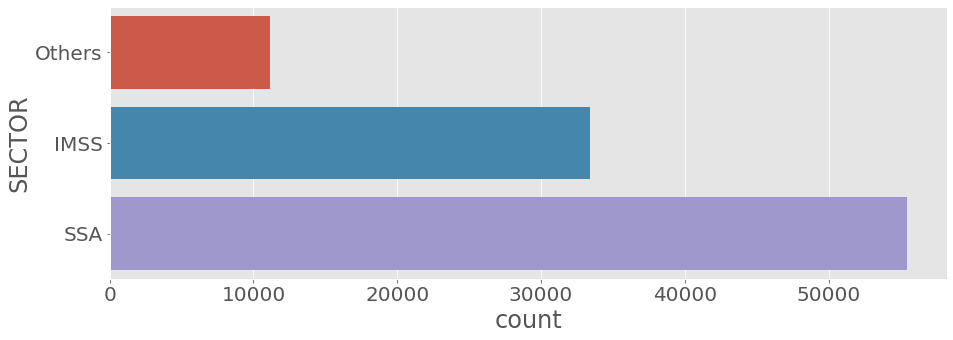

12    0.554193
4     0.334023
1     0.111784
Name: SECTOR, dtype: float64


In [13]:
mapping= {9:1,6:1,3:1,8:1,99:1,11:1,13:1,10:1,7:1,2:1,1:1,12:12,4:4}
df.SECTOR=df.SECTOR.map(mapping)
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(data=df, y='SECTOR')
ax.set(yticklabels=['Others', 'IMSS', 'SSA'])
plt.show()
print(df.SECTOR.value_counts(normalize=True))


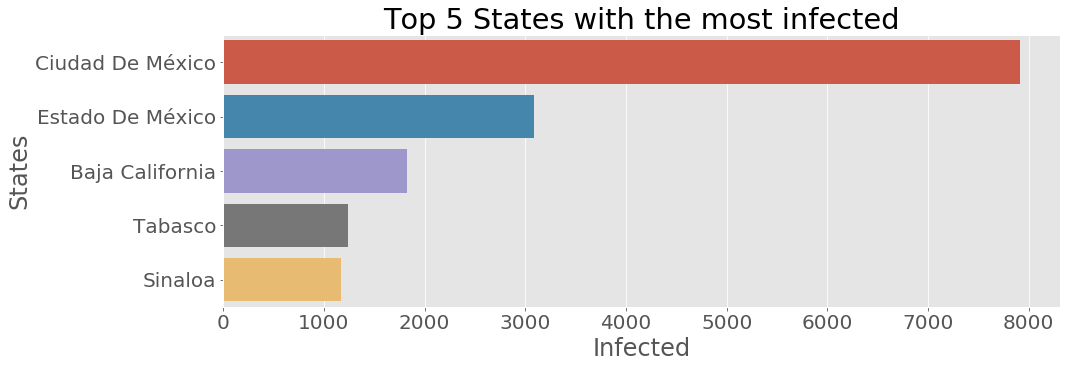

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
infectados = df[df['RESULTADO']==1]
top_afectados = infectados.groupby('ENTIDAD_UM').size().reset_index().sort_values(0,ascending=False).head(5)
estados = top_afectados.merge(dfe,left_on='ENTIDAD_UM',right_on='Clave Estado')
estados.rename(columns={0:'infectados'},inplace=True)
sns.barplot(y=estados.Estado,x=estados.infectados)
plt.title('Top 5 States with the most infected')
plt.xlabel('Infected')
plt.ylabel('States')
plt.show()

## Interest data

#### Number of positive tests

In [15]:
df[df.RESULTADO==1].RESULTADO.value_counts()

1    24905
Name: RESULTADO, dtype: int64

#### Number of negatives test

In [16]:
df[df.RESULTADO==2].RESULTADO.value_counts()

2    61993
Name: RESULTADO, dtype: int64

#### ICU patients

In [17]:
df[df.UCI==1].UCI.value_counts()

1    2250
Name: UCI, dtype: int64

#### number of deceased

In [18]:
len(df[df.FECHA_DEF!='9999-99-99'].FECHA_DEF)

3580

#### Number of people who tested positive and disease free

In [19]:
df["SANO"]=["SANO" if df.iloc[i, 19:29].sum()==20 else "ENFERMO" for i in range(len(df))]
len(df[(df.SANO == 'SANO') & (df.RESULTADO==1)])

11719

#### Number of people who have tested positive, without diseases and have died

In [20]:
len(df[(df.SANO == 'SANO') & (df.RESULTADO==1) & (df.FECHA_DEF!='9999-99-99')])

501

#### Average time between the date of symptoms and the date of death of those who tested positive

In [21]:
pos_difuntos=df[(df.RESULTADO==1) & (df.FECHA_DEF != '9999-99-99')]
(pd.to_datetime(pos_difuntos.FECHA_DEF) - pos_difuntos.FECHA_SINTOMAS).mean()


Timedelta('10 days 03:40:45.462555')

#### The disease with the highest prevalence in patients who test positive

In [22]:
positivos = df[df.RESULTADO==1]
positivos[positivos.iloc[:, 19:29]==1].iloc[:,19:29].apply(lambda x : x.value_counts())\
                                                    .max().sort_values(ascending=False)[[0]]

HIPERTENSION    5450
dtype: int64

#### The disease with the lowest prevalence in patients who test positive

In [23]:
positivos = df[df.RESULTADO==1]
positivos[positivos.iloc[:, 19:29]==1].iloc[:,19:29].apply(lambda x : x.value_counts())\
                                                    .max().sort_values()[[0]]

INMUSUPR    445
dtype: int64

#### Are there the same number of tubed patients as those in the ICU?

In [24]:
pacientes = df[df.RESULTADO==1]
entubados = pacientes[pacientes.INTUBADO==1]["INTUBADO"].value_counts().values
uci = pacientes[pacientes.UCI==1]["UCI"].value_counts().values

if entubados==uci:
    print("Is the same amount")
else:
    print("Not the same amount")


Not the same amount


## Graphs

### Number of people who test positive by state

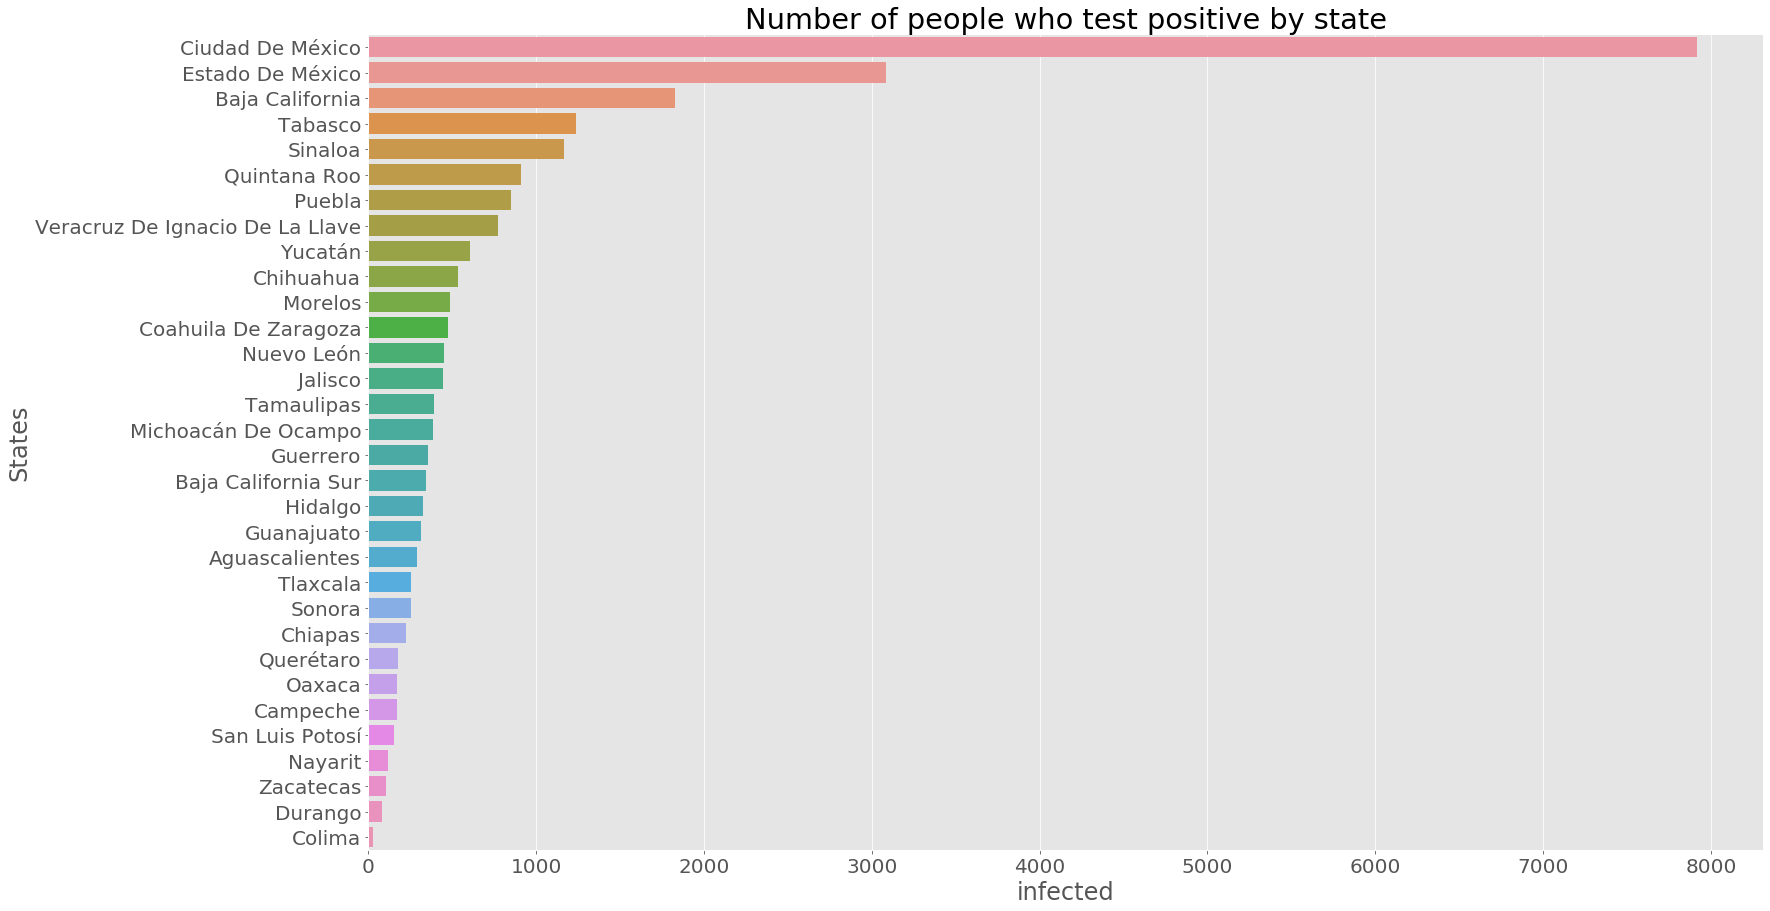

In [25]:
 fig, ax = plt.subplots(figsize=(25,15))
infectados = df[df['RESULTADO']==1]
top_afectados = infectados.groupby('ENTIDAD_UM').size().reset_index().sort_values(0,ascending=False)
estados_positivos = top_afectados.merge(dfe,left_on='ENTIDAD_UM',right_on='Clave Estado')
estados_positivos.rename(columns={0:'infectados'},inplace=True)
sns.barplot(y=estados_positivos.Estado,x=estados_positivos.infectados)
plt.title('Number of people who test positive by state')
plt.xlabel('infected')
plt.ylabel('States')
plt.show()

###  Number of people who test negative by state

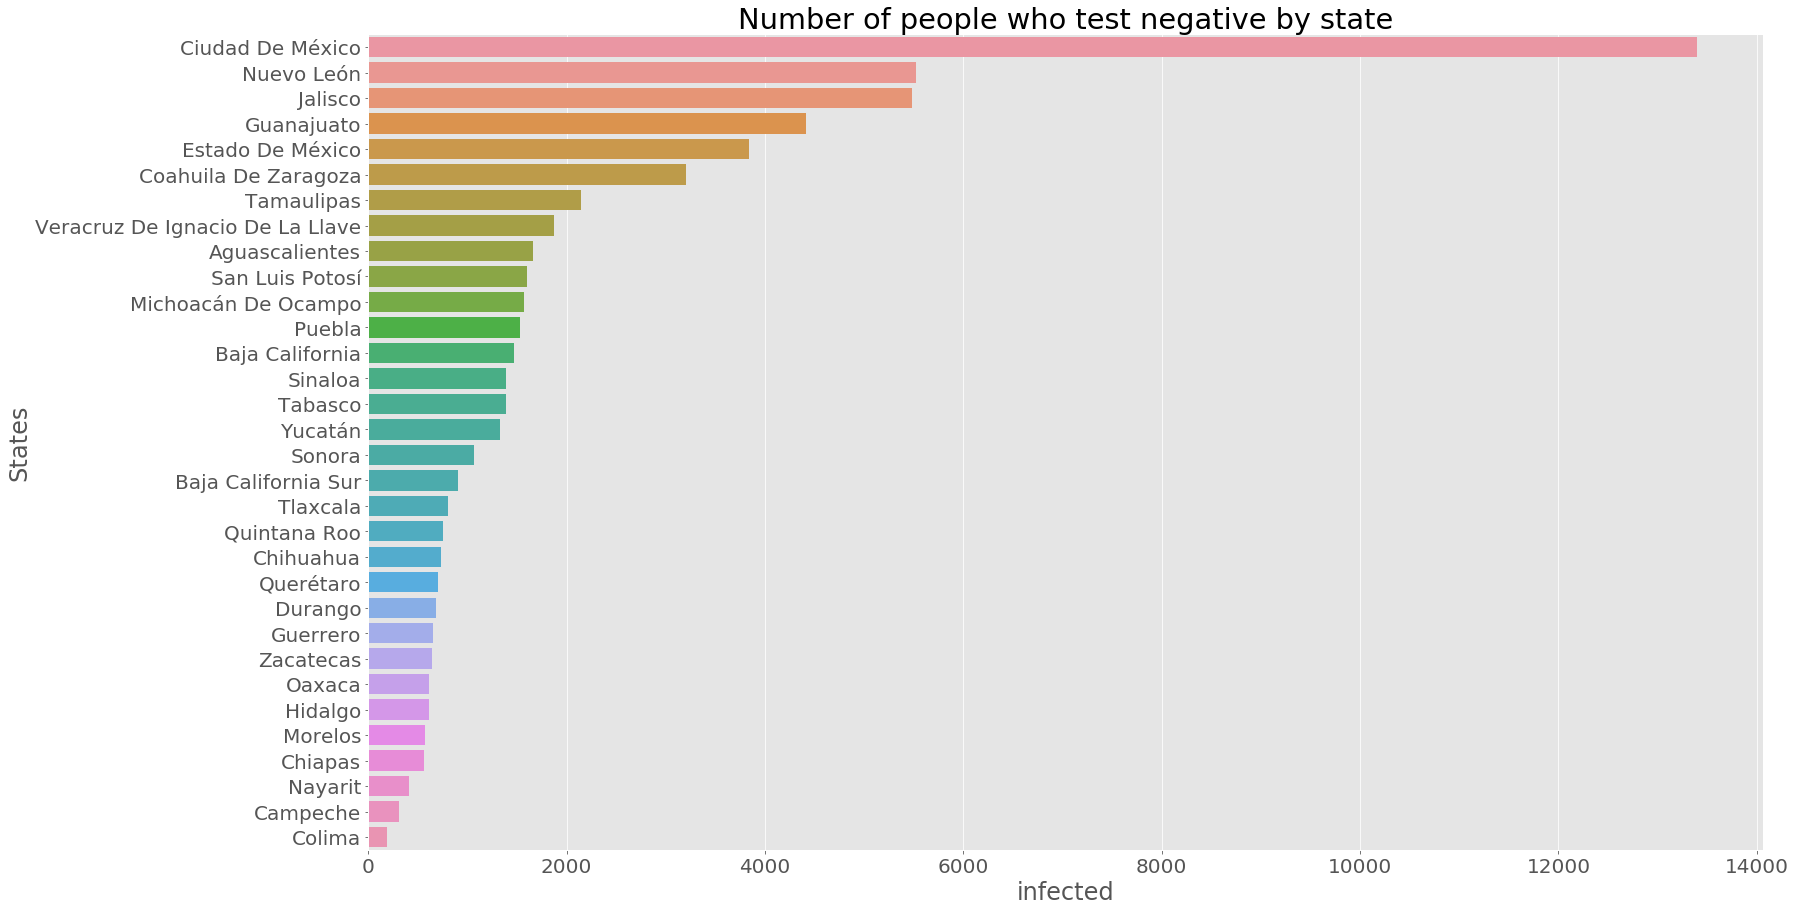

In [26]:
fig, ax = plt.subplots(figsize=(25,15))
infectados = df[df['RESULTADO']==2]
top_afectados = infectados.groupby('ENTIDAD_UM').size().reset_index().sort_values(0,ascending=False)
estados_negativos = top_afectados.merge(dfe,left_on='ENTIDAD_UM',right_on='Clave Estado')
estados_negativos.rename(columns={0:'infectados'},inplace=True)
sns.barplot(y=estados_negativos.Estado,x=estados_negativos.infectados)
plt.title('Number of people who test negative by state')
plt.xlabel('infected')
plt.ylabel('States')
plt.show()

### The municipality of each state with the most positives

In [27]:
result=df.merge(dfe, left_on='ENTIDAD_UM', right_on='Clave Estado', how = 'left')\
.merge(dfm, on = ['Clave Estado', 'Estado'], how = 'left').drop_duplicates(subset= 'ID_REGISTRO')

municipio_max = {}
for j in result['Estado'].unique():
    a = result[(result['RESULTADO'] == 1) & (result['Estado'] == j)]['Municipio'].value_counts().index[0]
    b = result[(result['RESULTADO'] == 1) & (result['Estado'] == j)]['Municipio'].value_counts()[0]
    municipio_max.update({a:b})
    
municipios_max = pd.DataFrame(municipio_max.items(), columns=['Municipios', 'Infectados'])\
                .sort_values('Infectados', ascending=False)

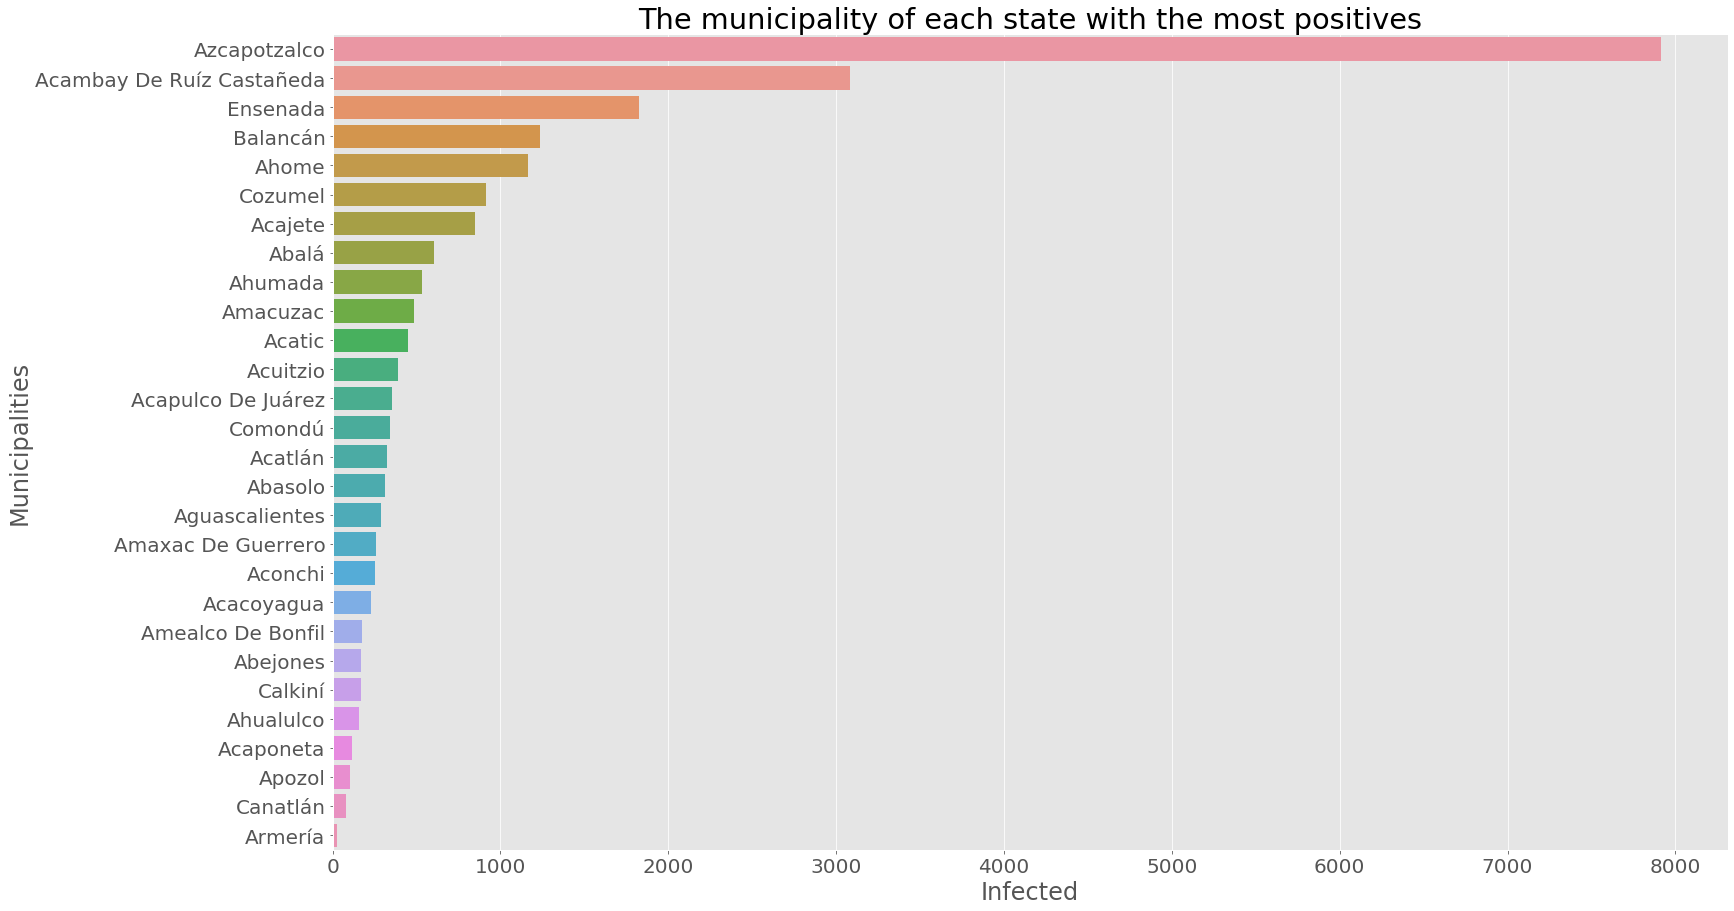

In [28]:
fig, ax = plt.subplots(figsize=(25,15))
sns.barplot(y = municipios_max.Municipios, x = municipios_max.Infectados)
plt.ylabel('Municipalities')
plt.xlabel('Infected')
plt.title('The municipality of each state with the most positives')
plt.show()

### Distribution of ages that have tested positive between men and women

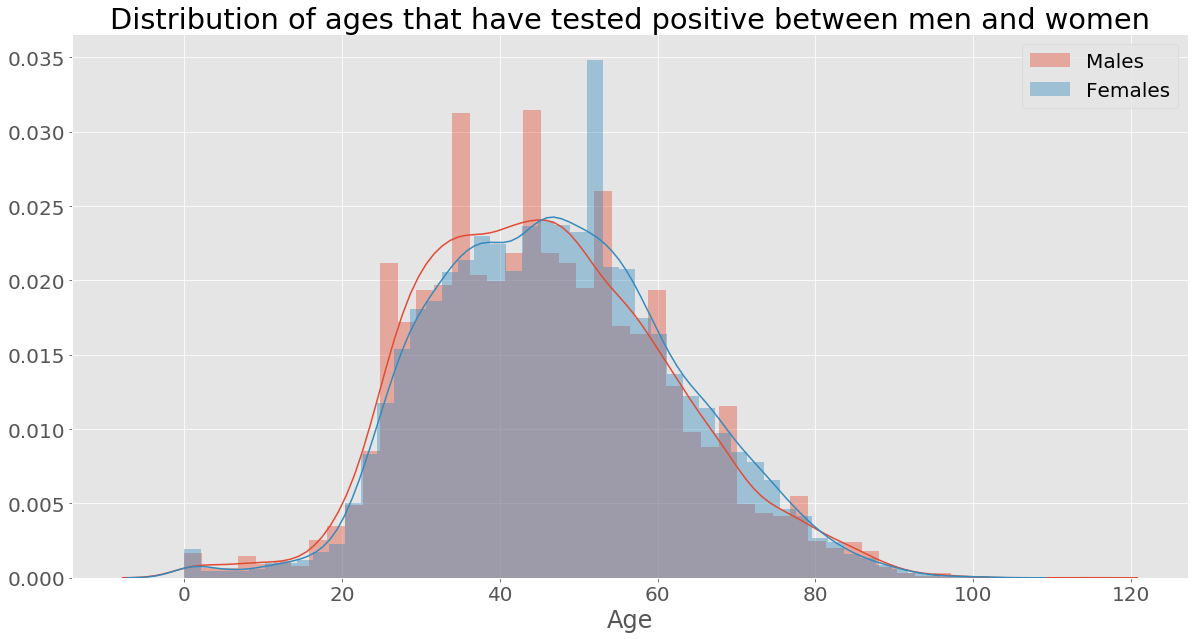

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(df[(df['RESULTADO'] == 1) & (df['SEXO'] == 1)]['EDAD'] ,label='Males')
sns.distplot(df[(df['RESULTADO'] == 1) & (df['SEXO'] == 2)]['EDAD'],label='Females')
plt.title('Distribution of ages that have tested positive between men and women')
plt.xlabel('Age')
plt.legend()
plt.show()

### Distribution of the ages that have given negative between men and women

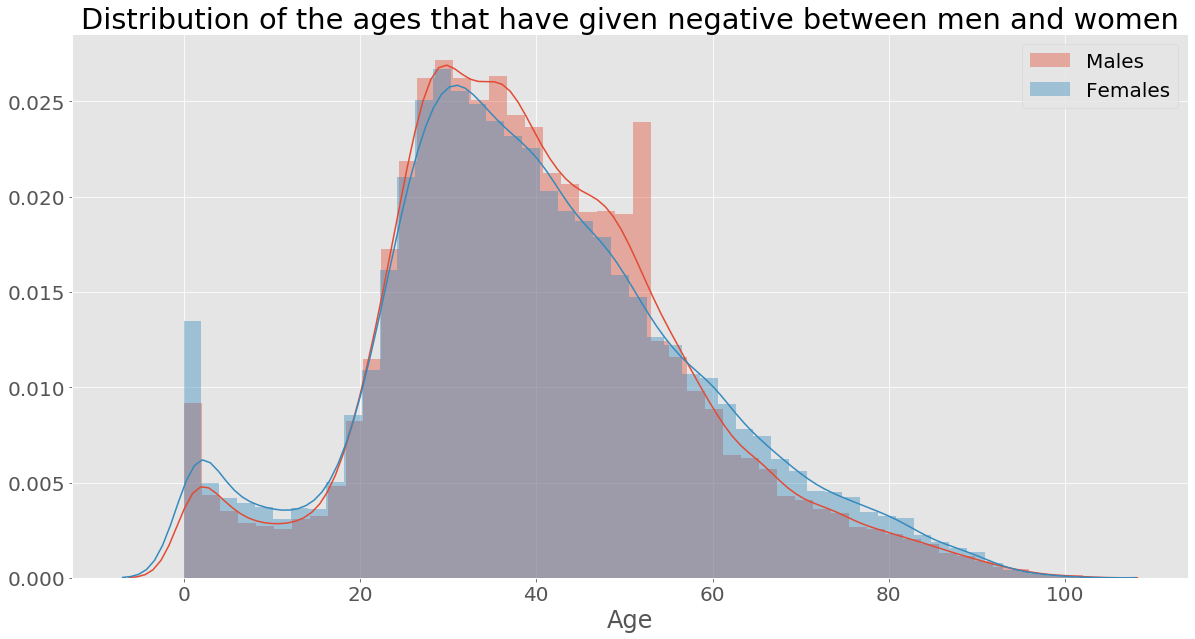

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(df[(df['RESULTADO'] == 2) & (df['SEXO'] == 1)]['EDAD'] ,label='Males')
sns.distplot(df[(df['RESULTADO'] == 2) & (df['SEXO'] == 2)]['EDAD'],label='Females')
plt.title('Distribution of the ages that have given negative between men and women')
plt.xlabel('Age')
plt.legend()
plt.show()

### Distribution of people who have died between men and women

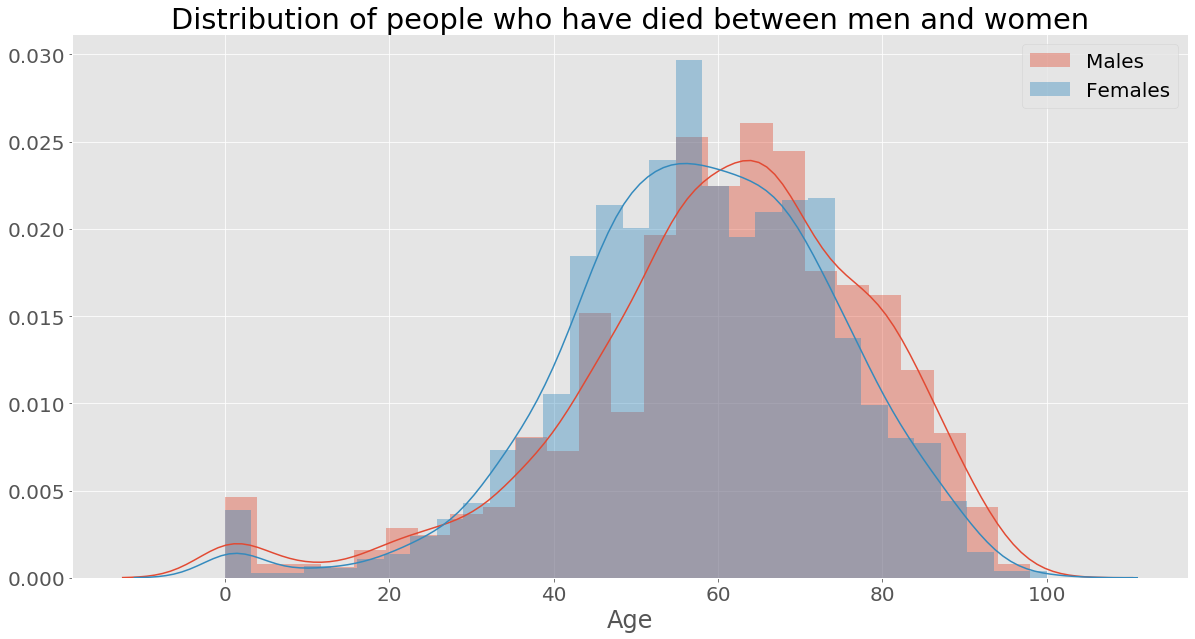

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(df[(df['FECHA_DEF'] != '9999-99-99') & (df['SEXO'] == 1)]['EDAD'] ,label='Males')
sns.distplot(df[(df['FECHA_DEF'] != '9999-99-99') & (df['SEXO'] == 2)]['EDAD'],label='Females')
plt.title('Distribution of people who have died between men and women')
plt.xlabel('Age')
plt.legend()
plt.show()

### Map with the number of positives for each state

In [32]:
estados_positivos.drop('Error', axis=1, inplace=True)
estados_positivos['Latitud']=estados_positivos.Latitud.astype(float)
estados_positivos['Longitud']=estados_positivos.Longitud.astype(float)
estados.columns

Index(['ENTIDAD_UM', 'infectados', 'Clave Estado', 'Estado', 'Latitud',
       'Longitud', 'Error'],
      dtype='object')

In [33]:
estados_positivos['infectados']=estados_positivos.infectados.astype(str) 
MX_map = folium.Map(location=[23.0000000, -102.0000000], zoom_start=5)

contagios=folium.map.FeatureGroup()
for lat, long in zip(estados_positivos.Latitud, estados_positivos.Longitud):
    contagios.add_child(
        folium.features.CircleMarker(
            [lat,long],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.5
        )
    )
latitudes = list(estados_positivos.Latitud)
longitudes = list(estados_positivos.Longitud)
labels = list(estados_positivos.infectados)

for lat, long, lab in zip(latitudes, longitudes, labels):
    folium.Marker([lat, long], \
                  popup=folium.Popup(lab + ' Infected',max_width='100%')).add_to(MX_map)
    
MX_map.add_child(contagios)